# **Códificación Huffman**

https://en.wikipedia.org/wiki/Huffman_coding

La codificación Huffman es un método ampliamente utilizado en la compresión de datos. Se utiliza para codificar un texto en binario, utilizando para cada letra un número de bits en función del número de veces que aparece la letra: cuanto más aparece la letra, menor es el número de bits. Por lo tanto, el número total de bits utilizados para codificar el texto se reduce en comparación con la codificación ASCII estándar que utiliza ocho bits para cada letra.

La codificación Huffman usa un método específico para elegir la representación de cada símbolo, que da lugar a un código prefijo (es decir, la cadena de bits que representa a un símbolo en particular nunca es prefijo de la cadena de bits de un símbolo distinto) que representa los caracteres más comunes usando las cadenas de bits más cortas, y viceversa. 

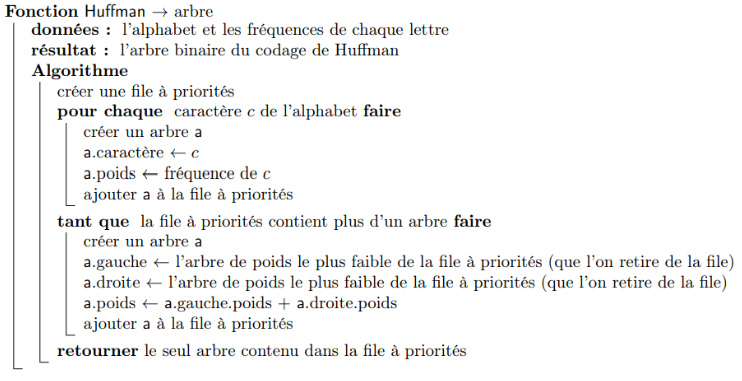

1. **Creación de una tabla de frecuencias:** El primer paso en la codificación Huffman es determinar la frecuencia de aparición de cada símbolo en los datos que se desean comprimir. Un símbolo puede ser un carácter individual, un byte o cualquier unidad de datos. Se crea una tabla de frecuencias que enumera cada símbolo y cuántas veces aparece en los datos.

2. **Creación de un árbol Huffman:** Una vez que se tiene la tabla de frecuencias, se procede a construir un árbol Huffman. Este árbol es una estructura jerárquica en la que los símbolos más comunes están más cerca de la raíz del árbol, mientras que los símbolos menos comunes están en las hojas más alejadas. El árbol se construye mediante un proceso de combinación de nodos. Los símbolos se convierten en nodos hoja del árbol, y se combinan en nodos padres hasta que se forma un solo nodo raíz.

3. **Asignación de códigos:** Una vez construido el árbol Huffman, se asignan códigos binarios a cada símbolo en función de su posición en el árbol. Los símbolos que están más cerca de la raíz del árbol obtienen códigos más cortos, mientras que los símbolos en las hojas obtienen códigos más largos. Estos códigos son únicos y tienen la propiedad de que ningún código es un prefijo de otro, lo que facilita la decodificación.

4. **Codificación de datos:** Con la tabla de códigos Huffman, se procede a codificar los datos originales. Cada símbolo se reemplaza por su código Huffman correspondiente. Los códigos son concatenados para formar una secuencia binaria que representa los datos comprimidos.

5. **Decodificación de datos:** Para decodificar los datos, se utiliza el mismo árbol Huffman que se utilizó para la codificación. Se comienza en la raíz del árbol y se recorre el árbol siguiendo los bits de la secuencia binaria. Cuando se llega a una hoja, se ha identificado un símbolo y se reinicia la búsqueda desde la raíz. Este proceso se repite hasta que se ha decodificado toda la secuencia.

### **1. Fuente de información**

In [2]:
# 1. Fuente de información (leyendo un archivo de texto)

def leer_archivo(nombre_archivo):
    try:
        with open(nombre_archivo, encoding="utf8") as archivo:
            contenido = archivo.read()
            return contenido
    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no fue encontrado.")
        return ""

nombre_archivo_fuente = "input.txt"
texto_original = leer_archivo(nombre_archivo_fuente)
print("Mensaje:", texto_original)

Mensaje: No Game No Life Volumen O1

Capı́tulo 1 - Principiante/Amateur

Parte 1
- En un pasado muy, muy lejano.
Los antiguos Deus 1 compitieron por el premio de ser el único Dios supremo y comenzaron
una guerra, junto con sus sirvientes y los seres que creaban.
Esta guerra duró mucho, mucho tiempo, tanto tiempo que se sentía natural.
No había tierra que no estuviera manchada con sangre, y los llantos de agonía nunca
cesaban su eco a través de los cielos.
Las razas inteligentes se odiaban mutuamente, se mataban mutuamente, y seguían
repitiendo incontables asesinatos.
Los elfos tenían pequeñas villas que eran sus bases, y lanzaban magia para cazar a sus
enemigos.
Los dragones utilizaban sus cuerpos para propósitos asesinos, y las bestias de guerra
devoraban a sus presas como animales.
La tierra que era cubierta por el ocaso, se convertía en tierra árida y éstas eran consumidas
por una profunda oscuridad debido a la guerra entre los antiguos Deus.
Los ‘Demon Lords’ 2 y sus monstruos alia

### **2. Transmisor**

In [3]:
# 2. Transmisor (Convierte el texto de entrada a binario)

def texto_a_binario(mensaje):
    binario = ''.join(format(ord(char), '08b') for char in mensaje)
    return binario

# El node del arbol
class Nodo:
    def __init__(self, char, freq, izq=None, der=None):
        self.char = char # Caracter.
        self.freq = freq # Frecuencia.
        self.izq = izq # Izquierda.
        self.der = der # Derecha.

def arbol(texto):
    freq = dict()
    for char in texto:
        if char not in freq:
            freq[char] = 0
        freq[char] += 1

    nodos = [Nodo(char, f) for char, f in freq.items()]
    while len(nodos) > 1:
        nodos = sorted(nodos, key=lambda x: x.freq)  # Ordena los nodos por frecuencia
        izq = nodos.pop(0)
        der = nodos.pop(0)
        nodo = Nodo(None, izq.freq + der.freq, izq, der)
        nodos.append(nodo)
    return nodos[0]  # Nodo raíz

def codificacion(nodo, codigo_binario="", diccionario=dict()):
    if nodo is None:
        return
    if nodo.char is not None:
        diccionario[nodo.char] = codigo_binario
    codificacion(nodo.izq, codigo_binario + "0", diccionario)
    codificacion(nodo.der, codigo_binario + "1", diccionario)
    return diccionario

In [4]:
texto_binario = texto_a_binario(texto_original)

### **3. Canal**

In [5]:
# 3. Canal (agregar ruido a la cadena binaria)

### **4. Receptor**

In [6]:
def decodificacion(texto_codificado, nodo_raiz):
    texto = ""
    nodo_actual = nodo_raiz
    for bit in texto_codificado:
        if bit == '0':
            nodo_actual = nodo_actual.izq
        else:  # bit == '1'
            nodo_actual = nodo_actual.der
        if nodo_actual.char is not None:  # Es un nodo hoja
            texto += nodo_actual.char
            nodo_actual = nodo_raiz
    return texto

In [7]:
raiz = arbol(texto_original)
diccionario = codificacion(raiz)
texto_codificado = "".join(diccionario[char] for char in texto_original)
texto_decodificado = decodificacion(texto_codificado, raiz)

### **5. Destino de información**

In [8]:
# 5. Destino de Información (Destinatario)

print("Cadena binaria original:",texto_binario)
print("Cadena binaria comprimida:",texto_codificado)
print("")
print("Mensaje enviado:",texto_original)
print("Mensaje recibido:",texto_decodificado)

with open("output.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(texto_decodificado)
print()
print("Mensaje decodificado guardado en 'output'.")

Cadena binaria original: 010011100110111100100000010001110110000101101101011001010010000001001110011011110010000001001100011010010110011001100101001000000101011001101111011011000111010101101101011001010110111000100000010011110011000100001010000010100100001101100001011100001001100011100000001011101000111010101101100011011110010000000110001001000000010110100100000010100000111001001101001011011100110001101101001011100000110100101100001011011100111010001100101001011110100000101101101011000010111010001100101011101010111001000001010000010100101000001100001011100100111010001100101001000000011000100001010001011010010000001000101011011100010000001110101011011100010000001110000011000010111001101100001011001000110111100100000011011010111010101111001001011000010000001101101011101010111100100100000011011000110010101101010011000010110111001101111001011100000101001001100011011110111001100100000011000010110111001110100011010010110011101110101011011110111001100100000010001000110010101110101011100110010

In [9]:
print("Lista de simbolos: ")
diccionario

Lista de simbolos: 


{'a': '000',
 'r': '0010',
 ',': '001100',
 'b': '001101',
 'c': '00111',
 'e': '010',
 'n': '0110',
 's': '0111',
 'f': '10000000',
 'E': '10000001',
 'P': '100000100',
 'N': '1000001010',
 'R': '10000010110',
 '¡': '10000010111',
 '!': '10000011000',
 'B': '100000110010',
 '5': '100000110011',
 'ñ': '1000001101',
 'A': '100000111',
 'v': '1000010',
 '6': '100001100000',
 '—': '100001100001',
 'M': '10000110001',
 'S': '1000011001',
 '¿': '100001101',
 '”': '10000111',
 't': '10001',
 'o': '1001',
 'g': '1010000',
 '“': '10100010',
 '?': '101000110',
 '1': '10100011100',
 'J': '10100011101',
 'U': '10100011110',
 'Q': '10100011111',
 '\n': '101001',
 'l': '10101',
 'd': '10110',
 'u': '10111',
 ' ': '110',
 'q': '1110000',
 '0': '11100010000',
 'G': '111000100010',
 '/': '1110001000110',
 '2': '1110001000111',
 'F': '1110001001000',
 'É': '1110001001001',
 'I': '1110001001010',
 '–': '1110001001011',
 'ı': '11100010011000',
 '́': '11100010011001',
 'Y': '11100010011010',
 '[': '111000